# Author : Eslam Mohamed
# K-Means Algorithm From Scratch
# First Version

In [53]:
from sklearn import datasets
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.preprocessing import Normalizer
import copy

In [54]:
# Reading Iris dataset
df = pd.read_csv('IRIS.csv')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [55]:
# See No. of classes in data
df['species'].nunique()

3

In [56]:
# Choosing only 2 features to help visualization
data = df.iloc[:,[0,2]]
data

,sepal_length,petal_length
0,5.1,1.4
1,4.9,1.4
2,4.7,1.3
3,4.6,1.5
4,5.0,1.4
...,...,...
145,6.7,5.2
146,6.3,5.0
147,6.5,5.2
148,6.2,5.4


In [57]:
# Converting data to numpy array
data_np = np.array([data.sepal_length,data.petal_length])
data_np.T.shape

(150, 2)

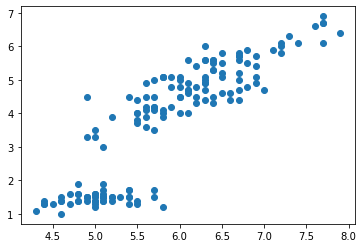

In [58]:
#plotting the data
plt.scatter(data.sepal_length,data.petal_length)

In [59]:
# function that initialize centroids

def init_centroids_2(data, no_of_centroids):
    
    #centroids = np.random.rand(no_of_centroids,data.shape[1])
    
    centroids = {
        
        i+1:[np.array(data.iloc[np.random.randint(0,len(data)),[0,1]])]
        for i in range(no_of_centroids)
        
             }
    return centroids


In [8]:
test_centeroids = init_centroids_2(data,3)
test_centeroids

{1: [array([4.4, 1.4])], 2: [array([6. , 4.5])], 3: [array([4.6, 1. ])]}

In [60]:
# Function that assign each point to nearest centeroid

def assigning_data_points(data , centroids):
    
    data_np = np.array([data.sepal_length,data.petal_length])

    temp_data = copy.deepcopy(data)

    for center in centroids.keys():
        diff_square = np.square(data_np.T - centroids[center][0].reshape(1,-1))
        
        diff_sum_square = np.sum(diff_square,axis=1)
        temp_data[f'distance_from{center}'] = diff_sum_square
        
    cols = [f'distance_from{center}' for center in centroids.keys()]
    temp_data['closest'] = temp_data.loc[:,cols].idxmin(axis=1)
    temp_data['closest'] = temp_data['closest'].map(lambda x : int(x.lstrip('distance_from')))
    return temp_data

In [61]:
# Adjusting centroids by calculatin average of points in each cluster

def adjust_centroids(data_new,centroids):
    for center in centroids.keys():
        if not data_new[data_new['closest'] == center].empty:
            centroids[center][0][0] = np.mean(data_new[data_new['closest'] == center]['sepal_length'])
            
            centroids[center][0][1] = np.mean(data_new[data_new['closest'] == center]['petal_length'])
    return centroids

In [72]:
# K-Means Algorithm

def k_means(data, k):
    
    centroids = init_centroids_2(data , k)
    new_data = assigning_data_points(data,centroids)

    while True:
        
        closest_centers = new_data['closest'].copy(deep = True)
        centroids = adjust_centroids(new_data,centroids)
        new_data = assigning_data_points(new_data,centroids)
#         print(1)
        if closest_centers.equals(new_data['closest']):
            return new_data, centroids
            break
#     return new_data, centroids

In [63]:
test_data , final_centers = k_means(data,3)
final_centers

1
1
1
1


{1: [array([6.31458333, 4.97395833])],
 2: [array([4.855, 1.64 ])],
 3: [array([5.43571429, 1.47857143])]}

In [64]:
# Test my centroids with sklearn Kmeans Algo.

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(data)
kmeans.cluster_centers_

array([[5.00784314, 1.49411765],
       [5.87413793, 4.39310345],
       [6.83902439, 5.67804878]])

In [65]:
test_data

,sepal_length,petal_length,distance_from1,distance_from2,distance_from3,closest
0,5.1,1.4,14.248391,0.117625,0.118878,2
1,4.9,1.4,14.774224,0.059625,0.293163,2
2,4.7,1.3,16.104849,0.139625,0.573163,2
3,4.6,1.5,15.008183,0.084625,0.698878,2
4,5.0,1.4,14.501308,0.078625,0.196020,2
...,...,...,...,...,...,...
145,6.7,5.2,0.199641,16.077625,15.447449,1
146,6.3,5.0,0.000891,13.377625,13.147449,1
147,6.5,5.2,0.085474,15.379625,14.981735,1
148,6.2,5.4,0.194641,15.946625,15.961735,1


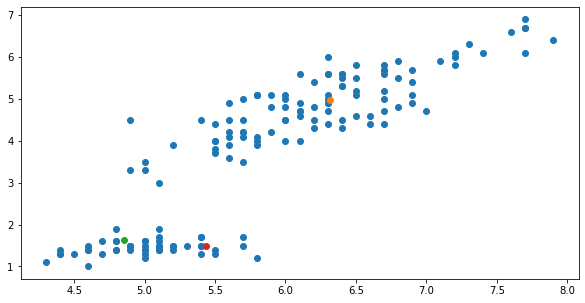

In [70]:
fig = plt.figure(figsize=(10,5))
plt.scatter(data_np[:][0],data_np[:][1])
for key in final_centers.keys():
    plt.scatter(*final_centers[key][0])
    
    
plt.show()
#cs[1][0]

In [86]:
cost_lst = []
k_hist = []
for k in range(2,10):
    final_data,final_centers = k_means(data,k)
    cost = 0
    for i in range(k):
        date = final_data[final_data['closest']==i+1]
        cost += np.sum(date.iloc[:,i+2])
    cost_lst.append(cost)
    k_hist.append(k)

print(k_hist)
print(cost_lst)

[2, 3, 4, 5, 6, 7, 8, 9]
[112.96262731481481, 53.80135119312654, 34.92285035609552, 30.606068398268395, 26.584683429984647, 28.41211006493506, 16.78039210789211, 15.303398961746058]


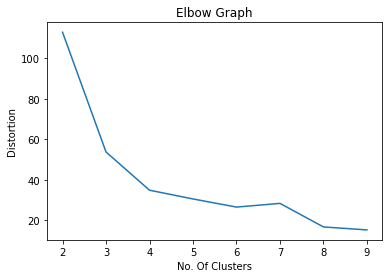

In [87]:
plt.plot(k_hist,cost_lst)
plt.title('Elbow Graph')
plt.xlabel('No. Of Clusters')
plt.ylabel('Distortion')
plt.show()

In [76]:
final_centers

{1: [array([5.00784314, 1.49411765])],
 2: [array([5.87413793, 4.39310345])],
 3: [array([6.83902439, 5.67804878])]}

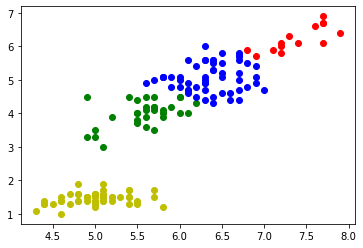

In [88]:
test_data , final_centers = k_means(data,4)
final_centers
plt.scatter(test_data[test_data['closest'] == 1]['sepal_length'],test_data[test_data['closest'] == 1]['petal_length'] , c='r')
plt.scatter(test_data[test_data['closest'] == 2]['sepal_length'],test_data[test_data['closest'] == 2]['petal_length'] , c='g')
plt.scatter(test_data[test_data['closest'] == 3]['sepal_length'],test_data[test_data['closest'] == 3]['petal_length'] , c='b')
plt.scatter(test_data[test_data['closest'] == 4]['sepal_length'],test_data[test_data['closest'] == 4]['petal_length'] , c='y')

# for key in final_centers.keys():
#     plt.scatter(*final_centers[key][0])
    
# plt.show()